
## ZMUM 4

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [90]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

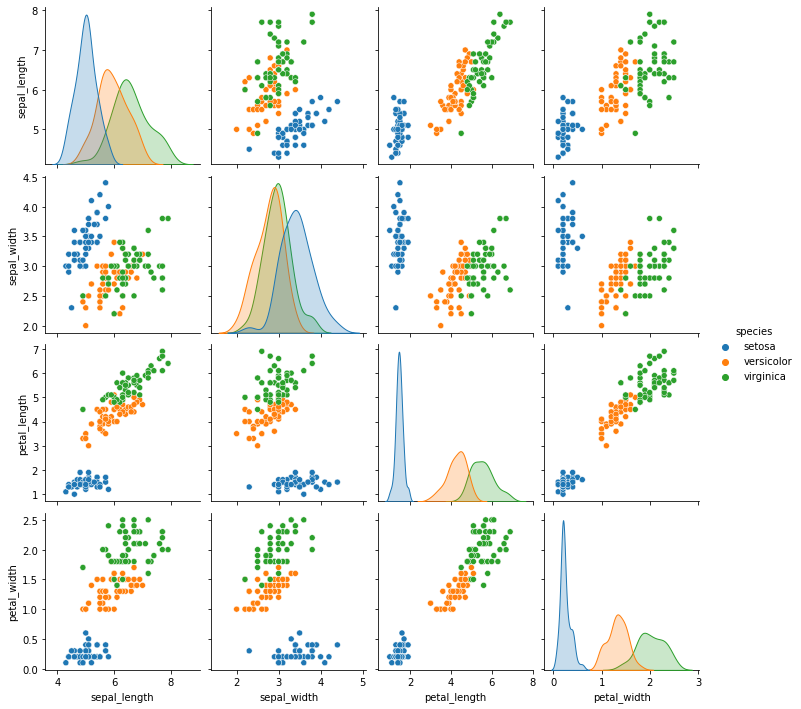

In [91]:
%matplotlib inline
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()

<AxesSubplot:>

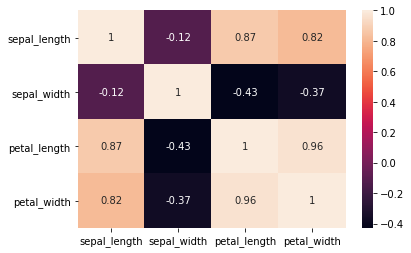

In [92]:
sns.heatmap(iris.corr(),annot = iris.corr())

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Najbardziej skorelowane:  
* petal_length & petal_width -> 0.96  

Najmniej skorelowane:  
* sepal_length & sepal_width -> -0.12

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [95]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [96]:
regressor = LinearRegression()  
regressor.fit(x,y)

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [97]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [98]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

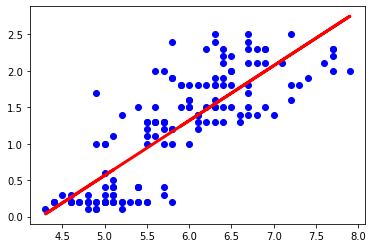

In [99]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [100]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427357

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość bładu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [101]:
def dopasowanie_liniowe(array,x_no,y_no):
    x = array.iloc[:,x_no].values.reshape(-1,1)
    y = array.iloc[:,y_no].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y)
    y_pred = regressor.predict(x)
    return {"w0":regressor.intercept_,
           "w1":regressor.coef_,
           "e": metrics.mean_squared_error(y, y_pred)}

print(dopasowanie_liniowe(iris, 0,3)['e'])

0.19101500769427357


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji ?

Zaskoczeniem nie jest, że wariancja jest najmniejsza gdy porównujemy te same zbiory danych - MSE jest równy 0. Co najmniej wiem, że kod działa.

Generalnie dla par, gdzie zachodzi korelacja jest raczej stosunkowo mała wariancja.
W przypadku par gdzie zachodzi słaba korelacja lub jej niema, czasami jest duża wariancja, czasami mała. Ciężko zauważyć zależność tej miary od miary korelacji.

In [102]:
m = 4
dopasowanie = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        dopasowanie[i,j] = dopasowanie_liniowe(iris, i,j)['e']

              sepal_length   sepal_width  petal_length  petal_width
sepal_length  2.366583e-31  1.861044e-01  7.430610e-01     0.191015
sepal_width   6.717073e-01  5.784980e-32  2.527289e+00     0.499769
petal_length  1.635002e-01  1.540726e-01  1.459721e-30     0.042067
petal_width   2.254326e-01  1.634163e-01  2.256317e-01     0.000000


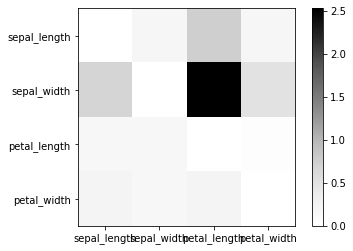

<AxesSubplot:>

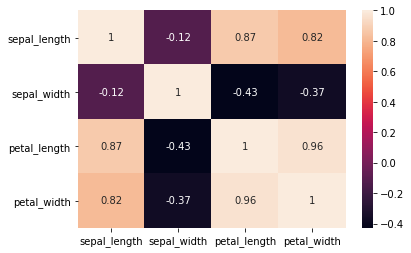

In [104]:
df = pd.DataFrame(dopasowanie, columns=iris.columns[0:4], index=iris.columns[0:4]) 
plt.imshow(df, cmap ="Greys") 
plt.colorbar() 
plt.xticks(range(len(df)), df.columns) 
plt.yticks(range(len(df)), df.index) 

print(df)
plt.show() 
sns.heatmap(iris.corr(),annot = iris.corr())

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

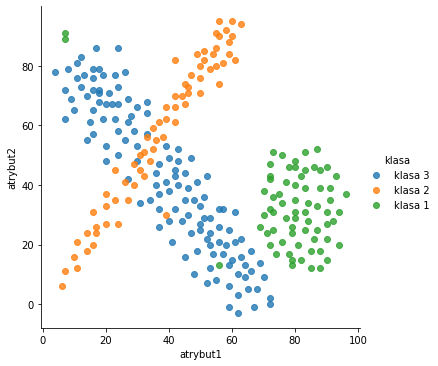

In [188]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=True)

In [306]:
print(d.shape)
d

(261, 3)


,atrybut1,atrybut2,klasa
0,61,31,klasa 3
1,66,18,klasa 3
2,69,14,klasa 3
3,72,2,klasa 3
4,62,-3,klasa 3
...,...,...,...
256,14,18,klasa 2
257,10,16,klasa 2
258,11,12,klasa 2
259,7,11,klasa 2


Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [191]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


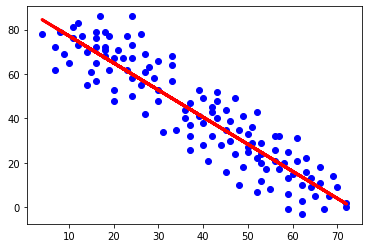

In [192]:
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [220]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [223]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

ValueError: illegal value in 4-th argument of internal None

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na ucżacy i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne ? Dlaczego ?

Uzyskane modele są najbadziej stabilne gdy rozkład danych ma małoą wariancję oraz brak punktów odstających ("klasa 2"). Wówczas mały błąd generalizacji uzyskuje się dla małego zbioru testowego (10%).
W przypadku "klasy 3" mamy doczynienia z większą wariancją i najmniejszy błąd generalizacji otrzymujemy dla zbioru testowego stanowiącego 30% całego zbioru. Może dla mniejszego zbioru testowego, zbiór ten jest zbyt słabo reprezentatywny, stąd duży błąd generalizacji. 

"Klasa 1" posiada kilka punktów odstających na, które metoda suma błędów kwadratów jest bardzo wrażliwa, wynikają z tegpo powodu pewne niestabliności. Dodatkowo w zależności od rozmiaru zbioru testowego, część punktów odstających należy do zbioru testowego lub nie, powoduje to również pewne niestabilości.

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trensu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


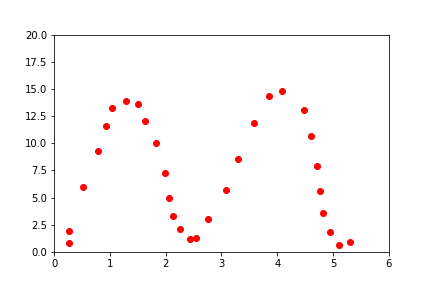

In [314]:
%matplotlib notebook
ile_probek = 30
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [315]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,x,y
0,0.268257,0.817754
1,0.268257,1.921507
2,0.519153,5.968601
3,0.787970,9.279859
4,0.931340,11.579344
5,1.038866,13.234973
6,1.289763,13.878829
7,1.504816,13.602890
8,1.630264,12.039241
9,1.827397,10.015694


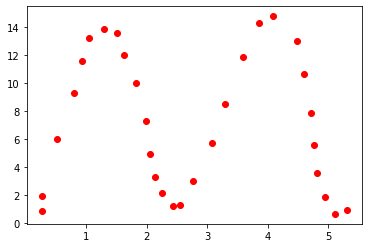

In [316]:
%matplotlib inline
plt.scatter(df.x, df.y, color='red')

> **Zadanie** Napisz funkcję, która stworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [387]:
def stworz_X(x, stopien):
    X = np.empty((x.shape[0], stopien+1))
    for idx, x_i in enumerate(x):
        X[idx,:] = [x_i**i for i in range(0,stopien+1)]
    return X
        
print(stworz_X(np.arange(1,8),3))

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]]


> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [367]:
X = stworz_X(df.x,3)
theta = np.dot(np.linalg.pinv(X) , df.y)
print(theta)
# Y = np.dot(X,theta)

[ 4.92286432  2.81814327 -0.54814868]


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


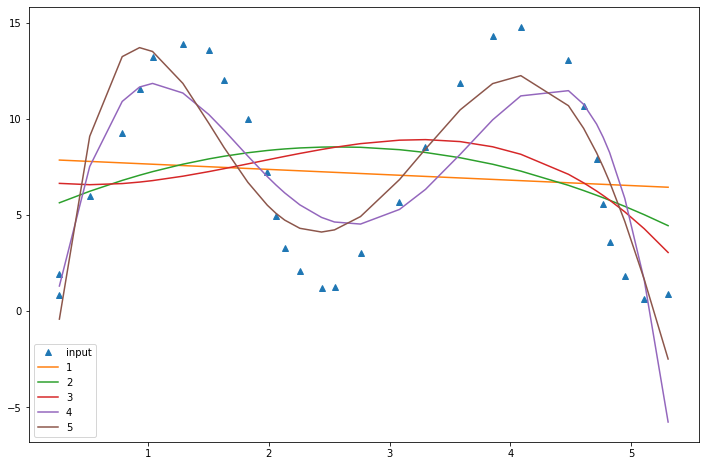

In [461]:
stopnie_wielomianu = np.array(range(1,6))

plt.figure(figsize=(12, 8))
plt.plot(df.x, df.y, '^', label="input")  

mean_square_error = np.empty(stopnie_wielomianu.shape)
for stopien in stopnie_wielomianu:
    X = stworz_X(df.x,stopien)
    theta = np.dot(np.linalg.pinv(X) , df.y)
    Y = np.dot(X,theta)
    plt.plot( df.x, Y , label=f"{stopien}")
    mean_square_error[stopien-1] = metrics.mean_squared_error(Y, df.y)
    
plt.legend(loc='lower left')

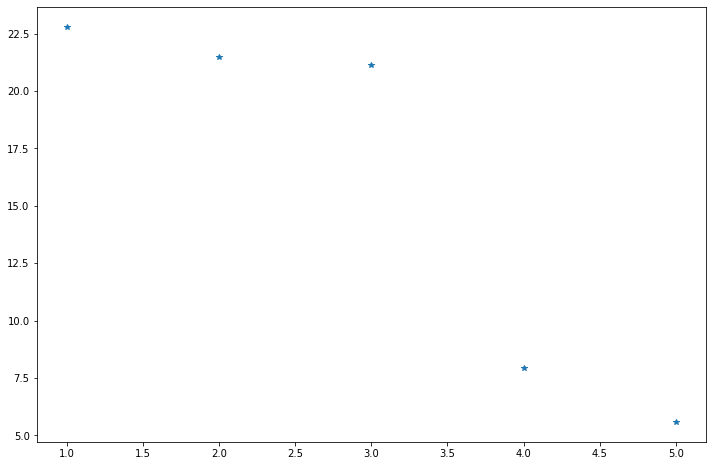

In [473]:
plt.figure(figsize=(12, 8))
plt.plot(stopnie_wielomianu, mean_square_error, '*')
plt.show()


W tym przypadku im większy stopień wielomianu, tym mniejszy MSE.

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

In [485]:
# wykiki uzyskane ręcznie
print(np.flipud(np.dot(np.linalg.pinv(stworz_X(df.x,5)) , df.y)))
# wyniki uzyskane przy użyciu polyfit
print(np.polyfit(df.x, df.y, 5))

[  0.32189149  -5.47557341  33.17303418 -86.60363527  91.56770434
 -19.35600175]
[  0.32189149  -5.47557341  33.17303418 -86.60363527  91.56770434
 -19.35600175]


> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

MSE ucz: [25.74012823  6.94060177  5.33072958  0.16277066  0.09037254  0.48935903], 
MSE test: [4.75503854e+00 1.93005309e+00 2.78049444e-01 4.09710644e-13
 6.99725476e-12 2.50588442e-09]


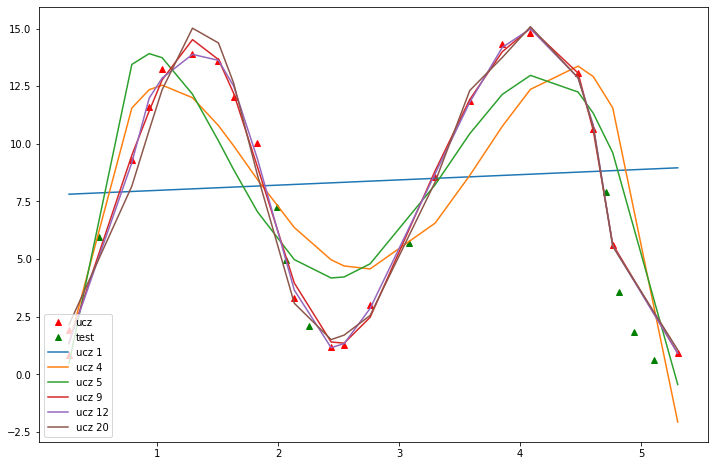

In [593]:
stopnie_wielomianu = np.array([1,4,5,9, 12, 20])
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.3, random_state=0)

x_ucz = x_ucz.sort_index()
x_test = x_test.sort_index()
y_ucz = y_ucz.sort_index()
y_test = y_test.sort_index()

plt.figure(figsize=(12, 8))
plt.plot(x_ucz, y_ucz, 'r^', label="ucz")  
plt.plot(x_test, y_test, 'g^', label="test")  

mse_ucz = np.empty(stopnie_wielomianu.shape)
for idx, stopien in enumerate(stopnie_wielomianu):
    X = stworz_X(x_ucz,stopien)
    theta = np.dot(np.linalg.pinv(X) , y_ucz)
    Y = np.dot(X,theta)
    plt.plot( x_ucz, Y, label=f"ucz {stopien}")
    mse_ucz[idx] = metrics.mean_squared_error(Y, y_ucz)
    
mse_test = np.empty(stopnie_wielomianu.shape)
for idx, stopien in enumerate(stopnie_wielomianu):
    X = stworz_X(x_test,stopien)
    theta = np.dot(np.linalg.pinv(X) , y_test)
    Y = np.dot(X,theta)
#     plt.plot( x_test, Y , label=f"test {stopien}")
    mse_test[idx] = metrics.mean_squared_error(Y, y_test)
    
plt.legend(loc='lower left')

print(f"MSE ucz: {mse_ucz}, \nMSE test: {mse_test}")

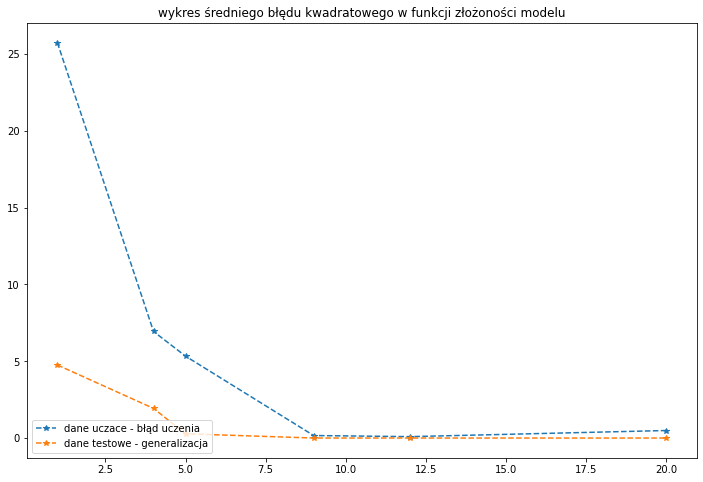

In [594]:
plt.figure(figsize=(12, 8))
plt.title('wykres średniego błędu kwadratowego w funkcji złożoności modelu')
plt.plot(stopnie_wielomianu, mse_ucz, '*--', label='dane uczace - błąd uczenia')
plt.plot(stopnie_wielomianu, mse_test, '*--', label='dane testowe - generalizacja')
plt.legend(loc='lower left')
plt.show()

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony? 
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. To zależy od danych. Jeżeli można je opisać jako wielomian, to możemy zminimalizować błąd uczenia do 0. W przypadku wykorzystywania regresji wielomianowej, dane te muszą być wyznaczone za pomocą wielomianu.
2. Lepiej dopierać tak stopień wielomianu aby błąd danych testowych był możliwie najmniejszy. Pomaga to uzyskać najlepszą generalizację  
3. Jeżeli dane można opisać wielomianem, np. pochodzą one z funkcji liniowej. To możliwe jest uzyskanie dokładnie tej samej funkcji wielomiatowej - rozwiązania nie będą przybliżone, tylko dokłądnie takie jak w uzyskanych danych. Wówczas zbiór danych testowych powinien być pusty.
4. Wielkości parametrów modelu zawiększają swoje wartości wraz z zwiększeniem stopnia wielomianu. Powoduje to również zwiększenie dynamiki przebiegu funkcji.
